## 🔮 Bayes Classifier

You are required to implement the  in `BayesClassifier.py`:
Bayes Classifier is a generic model covered in last week's lecture. It performs inference for a new point $x_{test}$ using the classification rule:

$$x_{test} = argmax_{k} P\big(C_k|x_{test}\big) = argmax_{k} P(x_{test}|C_k) * P(C_k)$$

**Three cases of the Bayes classifier were covered in the lecture each tantamount to a different machine learning model:**
1. Assume multivariate Normal distribution for each class conditional density $P(X|C_{i})$. In this case, Bayes Classifier is also known as `Quadratic Discriminant Analysis`. This is the general setting.

2. Assume Multivariate Normal distribution for each class conditional density $P(X|C_{i})$ while assuming the different classes have equal covariances $\Sigma_1=\Sigma_2=...=\Sigma_K$. This is known as `Linear Discriminant Analysis`.
    - In this case, when the different classes have unequal covariance matrices, the single one used is their weighted sum where the weights are the prior probabilities. 
    - That is for $K$ classes, $Σ = p_1*\Sigma_1 + p_2*\Sigma_2 + ...+ p_K*\Sigma_K$

3. Assume one-dimensional Normal distribution for each feature in $X$, for each class. This is known as `Gaussian Naive Bayes` and it's naive in the sense that it assumes that the input features are independent when that is rarely the case. 
    - This is also equivalent to assuming that each class has a diagonal covariance matrix as a diagonal covariance matrix only occurs when the input variables (features) are uncorrelated.

**You are required to implement seven methods in `BayesClassifier.py`**
<br><br>
```python
__init__(self, mode='QDA')
```
- Decides the type of the Bayes classifier `QDA` or `LDA` or `Naive` and declares the variables for model parameters
<br><br>
```python
fit(self, x_train, y_train)
```
- Takes two numpy arrays `x_train` and `y_train` of shapes `(m,n)` and `(m)` respectively and sets the model parameters by computing the model parameter according to the mode. It doesn't return anything; only mutates the model parameters.
<br><br>
```python
N(x, μ, Σ)
```
- Given `x` of dimensions `(n,)` and `μ` of dimensions `(n,)` and `Σ` of dimensions `(n,n)` return a scalar probability of observing `x` using the multivariate normal distribution:
$$P(x) = \mathcal{N}(x; \mu, \Sigma) = \frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} exp\big(\frac{-1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\big)$$
Observe that this automatically computes $P(x|C_{k})$ when given $μ=μ_K$ and $Σ=Σ_K$
<br><br>


```python
predict_proba_x(self, x)
```
- Given `x` of dimensions `(n,)` use Bayes rule to compute $P(C_{k}|x)$ for $1<=k<=K$ and return such probabilities in a numpy array of dimensions `(K,)`
- Recall that Bayes rule states:
$$P(C_k|X)=\frac {P(X|C_k)P(C_k)}{P(X)}$$

```python
predict_proba_x(self, x_val)
```
- Given `x_val` of dimensions `(m,n)` return a numpy array of dimensions `(m,K)` by applying `predict_proba_x(self, x)` to each row in `x_val`. In other words, this maps each point in the validation set to the probability of it belonging to each class.
<br><br>

```python
predict(self, x_val)
```
- Given `x_val` of dimensions `(m,n)` return a numpy array of dimensions `(m)` that applies Bayes classification rule on each row in `x_val` by first computing the probabilities with `predict_proba_x` then applying argmax over each row.
<br><br>

```python
score(self, x_val, y_val)
```
- Given `x_val` use Bayes classification rule to compute `y_pred` and compute the accuracy by comparing it to the true labels in `y_val`

### Test Bench

You need to understand the code below. If there were more time, it would have been a task for you as well to write the testing code as in all software engineering.

In [1]:
%load_ext autoreload
%autoreload 2
# No need to restart the notebook upon change thanks to autoreload
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from BayesClassifier import BayesClassifier

#### Generate Synthetic Data

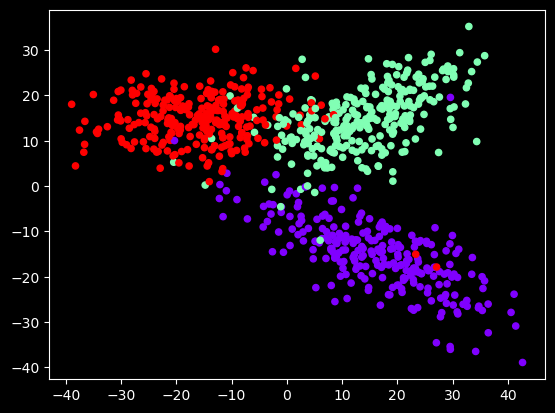

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, 
                           random_state=0,  n_informative=2, n_redundant=0, class_sep=1.5, scale=10)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.style.use('dark_background')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=20, cmap='rainbow')
plt.show()

#### Testing Normal Distribution

#### 1) Testing QDA

1.1 Fits without errors

In [3]:
my_classifier = BayesClassifier(mode='QDA')
my_classifier.fit(x_train, y_train)

1.2 Test basic properties of parameters

In [4]:
assert len(my_classifier.means) == len(my_classifier.labels)
assert my_classifier.means[0].shape == (2,)
assert len(my_classifier.covs) == len(my_classifier.labels)
assert my_classifier.covs[0].shape == (2,2)
assert len(my_classifier.priors) == len(my_classifier.labels)
assert my_classifier.priors.sum() == 1
assert my_classifier.weighted_cov == None

1.3 Test that parameters are set correctly

In [5]:
# compare with scikit parameters
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf.fit(x_train, y_train)
assert np.allclose(my_classifier.means, clf.means_)
assert np.allclose(my_classifier.covs, clf.covariance_)
assert np.allclose(my_classifier.priors, clf.priors_)

1.4 Test the PDF of the Normal Distribution

In [6]:
### Test your implementation ###
### DO NOT CHANGE THIS CODE ###
np.random.seed(90)
assertion_x = np.random.rand(3)
assertion_mu = np.random.rand(3)
assertion_sigma = np.random.rand(3, 3)
assertion_probability = BayesClassifier.N(assertion_x, assertion_mu, assertion_sigma)
assertion_probability = round(assertion_probability, 1)
assert assertion_probability == 7.8, assertion_probability

1.5 Basic test for `predict_proba_x` 

In [7]:
y_pred = my_classifier.predict_proba_x(np.random.rand(2))
assert y_pred.shape == (3,)
assert np.allclose(np.sum(y_pred), 1)

1.6 It follows that `predict_proba` is implemented correctly

In [8]:
assert np.allclose(my_classifier.predict_proba(x_val), clf.predict_proba(x_val))

1.7 Test `predict`

In [9]:
y_pred = my_classifier.predict(x_val)
assert y_pred.shape == y_val.shape
assert np.allclose(y_pred, clf.predict(x_val))

1.8 Test `accuracy`

In [10]:
assert np.allclose(my_classifier.score(x_val, y_val), clf.score(x_val, y_val))

#### 2) Testing LDA

In [11]:
my_classifier = BayesClassifier(mode='LDA')
my_classifier.fit(x_train, y_train)

2.1 Test basic properties of parameters

In [12]:
assert len(my_classifier.means) == len(my_classifier.labels)
assert len(my_classifier.covs) == 0
assert len(my_classifier.priors) == len(my_classifier.labels)
assert my_classifier.priors.sum() == 1

2.2 Test parameter values

In [13]:
clf = LinearDiscriminantAnalysis(solver='eigen', store_covariance=True)
clf.fit(x_train, y_train)
assert np.allclose(my_classifier.weighted_cov, clf.covariance_)
assert np.allclose(my_classifier.means, clf.means_)
assert np.allclose(my_classifier.priors, clf.priors_)

2.3 Basic test for `predict_proba_x` 

In [14]:
y_pred = my_classifier.predict_proba_x(np.random.rand(2,))
assert y_pred.shape == (3,)
assert np.allclose(np.sum(y_pred), 1)

2.4 End-to-end tests

In [15]:
assert np.allclose(my_classifier.predict_proba(x_val), clf.predict_proba(x_val))

y_pred = my_classifier.predict(x_val)
assert y_pred.shape == y_val.shape
assert np.allclose(y_pred, clf.predict(x_val))

assert np.allclose(my_classifier.score(x_val, y_val), clf.score(x_val, y_val))

#### 3) Testing Gaussian Naive Bayes

In [16]:
my_classifier = BayesClassifier(mode='Naive')
my_classifier.fit(x_train, y_train)

3.1 Test basic properties of parameters

In [17]:
assert len(my_classifier.means) == len(my_classifier.labels)
assert len(my_classifier.covs) == len(my_classifier.labels)
assert len(my_classifier.priors) == len(my_classifier.labels)
assert my_classifier.priors.sum() == 1
assert my_classifier.weighted_cov == None

3.2 Test parameter values

In [18]:
clf = GaussianNB()
clf.fit(x_train, y_train)
assert np.allclose(my_classifier.priors, clf.class_prior_)
assert np.allclose(my_classifier.means, clf.theta_)
# loop on each row of clf.var_ and ensure the computed variances for a class are the diagonal of corresponding covariance matrix
for i in range(clf.var_.shape[0]): assert np.allclose(my_classifier.covs[i], np.diag(clf.var_[i]))

3.3 End-to-end test

In [19]:
assert np.allclose(my_classifier.predict_proba(x_val), clf.predict_proba(x_val))

y_pred = my_classifier.predict(x_val)
assert y_pred.shape == y_val.shape
assert np.allclose(y_pred, clf.predict(x_val))

assert np.allclose(my_classifier.score(x_val, y_val), clf.score(x_val, y_val))

<div align="center">
    <img src="https://i.imgur.com/LMiA2O5.gif" width=800/>
</div>